In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [4]:
# read training data
bank_train = pd.read_csv("training-training-bank_train/bank_train.csv")

In [5]:
print(bank_train.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   49       284         1    999         0           1.4          93.918   
1   58       374         1    999         0           1.4          93.918   
2   36       529         1    999         0           1.4          93.444   
3   47       216         1    999         0           1.4          94.465   
4   38       191         1    999         0          -1.8          92.893   

   cons.conf.idx  euribor3m  nr.employed  ...  job  marital  education  \
0          -42.7      4.957       5228.1  ...    1        0          7   
1          -42.7      4.963       5228.1  ...    5        1          0   
2          -36.1      4.965       5228.1  ...    0        3          6   
3          -41.8      4.961       5228.1  ...    4        1          0   
4          -46.2      1.313       5099.1  ...    0        2          7   

   default  housing  loan  contact  month  day_of_week  poutcome  
0        1        2     0

In [6]:
# split into x_train and y_train
x_train = bank_train.drop(['purchased', 'id'], axis=1)
y_train = bank_train[['purchased']]

In [7]:
# Hyperparameter tuning: maxdepth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on: specify a range of max_depth
parameters = {'max_depth': range(1,20)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                  scoring="accuracy",
                  return_train_score=True)
tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',


In [8]:
# scores of GridSearch CV
scores = tree.cv_results_
print(pd.DataFrame(scores).head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.011733      0.003378         0.001798        0.000507   
1       0.010922      0.003846         0.002415        0.002398   
2       0.013993      0.001524         0.002028        0.002255   
3       0.015308      0.003553         0.001943        0.001716   
4       0.019603      0.006080         0.005246        0.003937   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.893778           0.893778   
1               2  {'max_depth': 2}           0.901366           0.895296   
2               3  {'max_depth': 3}           0.901366           0.902883   
3               4  {'max_depth': 4}           0.911988           0.890744   
4               5  {'max_depth': 5}           0.890744           0.895296   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.893778           0.893778  ...         

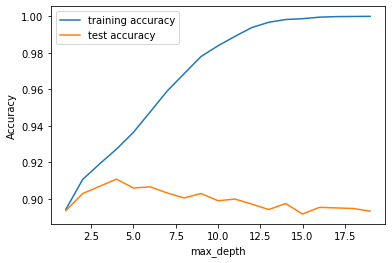

In [9]:

# plotting accuracies with max_depth (code already written)
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import os
# from sklearn import metrics, preprocessing
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

# # read training data
# bank_train = pd.read_csv("/data/training/bank_train.csv")

# # read test data
# bank_test = pd.read_csv("/data/test/bank_test.csv")

# # print(bank_train.head())
# # print(bank_test.head())

# ##########################
# ## WRITE YOUR CODE HERE ##
# ##########################

# # Build the model 
# # print(bank_train.columns)

# # split into x_train and y_train
# x_train = bank_train.drop(['purchased', 'id'], axis=1)
# y_train = bank_train[['purchased']]

# # Hyperparameter tuning: maxdepth
# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on: specify a range of max_depth
# parameters = {'max_depth': range(1,20)}

# # instantiate the model
# dtree = DecisionTreeClassifier()

# # fit tree on training data
# tree = GridSearchCV(dtree, parameters, 
#                     cv=n_folds, 
#                   scoring="accuracy",
#                   return_train_score=True)
# tree.fit(x_train, y_train)

# # scores of GridSearch CV
# scores = tree.cv_results_
# # print(pd.DataFrame(scores).head())

# # plotting accuracies with max_depth (code already written)
# plt.figure()
# plt.plot(scores["param_max_depth"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_max_depth"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("max_depth")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()
# plt.savefig('/code/output/hyperparam.png') 

# # observe the optimal value of max_depth from the plot and store 
# # in max_depth_optimal
# max_depth_optimal = 4

# # Build a tree with optimal max_depth
# best_tree = DecisionTreeClassifier(max_depth=max_depth_optimal)
# best_tree.fit(x_train, y_train)

# # make predictions on test data
# predictions = best_tree.predict(bank_test.drop(['id'], axis=1))
# # print(predictions[:5])


# # Write columns id, predictions into the output file
# d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

# # Write the output to file
# d.to_csv('/code/output/bank_predictions.csv', sep=",")